                                    **SCHOLAR NURTURE**      

**Research Problem**: Customers satisfaction is key for any business success. Customers thatare dissatisfied with the Company’s product or service are not noticed until when it starts becoming visible in the company’s Profit statements. Dissatisfied Customers rarely voice out their dissatisfaction before leaving. Building a model that can help predict customers’ satisfaction before they leave will be helpful for Customer retention and to build customer loyalty. This will give Company’s insight on possible weakness found and creates a platform for them to build their decisions from.

**Objective**: To build a model that can help classify Airline Customers as satisfied or not.

In [ ]:
import io
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files
#ignoring warnings
warnings.filterwarnings("ignore")

### Data Wrangling

In [ ]:
#Uploading csv file
uploaded = files.upload()

Saving Invistico_Airline.csv to Invistico_Airline.csv


In [ ]:
customers = pd.read_csv(io.BytesIO(uploaded['Invistico_Airline.csv']))

In [ ]:
customers.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,0,2,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,2,0,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,3,4,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,4,3,4,2,2,0,2,4,2,5,0,0.0


In [ ]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Seat comfort                       129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Food and drink                     129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Inflight wifi service              1298

In [ ]:
customers.shape

(129880, 23)

In [ ]:
customers.describe()

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,39.427957,1981.409055,2.838597,2.990645,2.851994,2.990422,3.249130,3.383477,3.519703,3.472105,3.465075,3.485902,3.695673,3.340807,3.705759,3.352587,14.713713,15.091129
std,15.119360,1027.115606,1.392983,1.527224,1.443729,1.305970,1.318818,1.346059,1.306511,1.305560,1.270836,1.292226,1.156483,1.260582,1.151774,1.298715,38.071126,38.465650
min,7.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,1359.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,1925.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000
75%,51.000000,2544.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,6951.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [ ]:
customers.isnull().sum()

satisfaction                           0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

Filling Nan values in Arrival Delay in Minutes column with the Mode.

In [ ]:
customers['Arrival Delay in Minutes'].fillna(customers['Arrival Delay in Minutes'].mode()[0], inplace = True)

In [ ]:
customers.isnull().sum().sum()

0

In [ ]:
#Rearranging the columns
customers = customers[['Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Seat comfort',
       'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
       'Inflight wifi service', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'satisfaction']]
customers.head(2)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0,0.0,satisfied
1,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,0,2,2,3,4,4,4,2,3,2,310,305.0,satisfied


## Exploratory Data Analysis

In [ ]:
#Creating a data frame containing the Gender and their the count of their customer type
temp = pd.crosstab(customers['Gender'], customers['Customer Type'])
customers_cat = temp.div(temp.sum(1).astype(float), axis = 0)
customers_cat

Customer Type,Loyal Customer,disloyal Customer
Gender,,
Female,0.805111,0.194889
Male,0.829059,0.170941


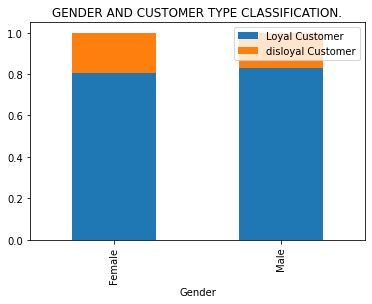

In [ ]:
#plotting customers gender with their customer type.
customers_cat.plot(kind = 'bar', stacked = True)
plt.legend(loc = 'upper right')
plt.title('GENDER AND CUSTOMER TYPE CLASSIFICATION.')
plt.show()

We can see in the above Plot that more Male Customers are tagged Loyal Customers than the Females, though the margin is very little.

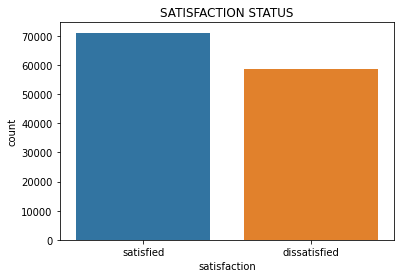

In [ ]:
#plotting the count of satisfaction status of Customers
sns.countplot(x = 'satisfaction', data = customers)
plt.title('SATISFACTION STATUS')
plt.show()

Above we can see that there are 71087 Satisfied Customers and 58793 Dissatisfied Customers

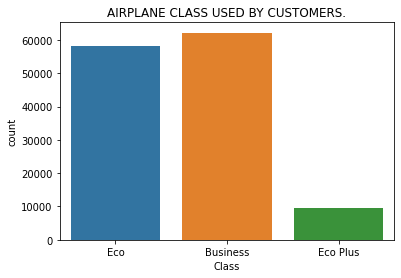

In [ ]:
#plotting the class of customers 
sns.countplot(x = 'Class', data = customers)
plt.title('AIRPLANE CLASS USED BY CUSTOMERS.')
plt.show()

**Checking the Distribution of Customers Flight Distance**

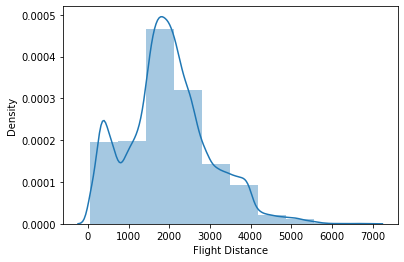

In [ ]:
sns.distplot(customers['Flight Distance'], bins = 10)

## Model Building.

In [ ]:
#imports all neccessary libraries for modelling and evaluation
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

#### Label Encoder

**Note: Satisfied = 1, Dissatisfied == 0**

In [ ]:
#instantiating the module
encoder = LabelEncoder()
customers['satisfaction'] = list(encoder.fit_transform(customers['satisfaction'].tolist()))
customers['Class'] = list(encoder.fit_transform(customers['Class'].tolist()))
customers['Type of Travel'] = list(encoder.fit_transform(customers['Type of Travel'].tolist()))
customers['Customer Type'] = list(encoder.fit_transform(customers['Customer Type'].tolist()))
customers['Gender'] = list(encoder.fit_transform(customers['Gender'].tolist()))

In [ ]:
customers.satisfaction.tolist()[:5]

[1, 1, 1, 1, 1]

In [ ]:
#defining the Independent variable and dependent variable
X = customers.drop(labels = 'satisfaction', axis = 1)
y = customers['satisfaction']

In [ ]:
#splitting the dataset by 7:3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 1)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((90916, 22), (38964, 22), (90916,), (38964,))

In [ ]:
# let make a function that will fit and score the model
models = {"Logistic Regression": LogisticRegression(random_state=42),
         "KNN": KNeighborsClassifier(n_neighbors = 1),
         "Decision Tree": DecisionTreeClassifier()}
 
def fit_and_score(models,X_train,X_test,y_train,y_test):
    """
    X_train:training data with features but no label
    X_test: test data with features but no label
    y_train: training data with label but no features
    y_test: test data with label with no features
    """
    #create an empty dictionary to score the model
    model_score = {}
    #create a for loop to loop through the dictionary 
    for name,model in models.items():
        model.fit(X_train,y_train)
        model_score[name] = model.score(X_test, y_test)
    return model_score

In [ ]:
fit_and_score(models,X_train,X_test,y_train,y_test)

{'Decision Tree': 0.9379427163535571,
 'KNN': 0.6840930089313212,
 'Logistic Regression': 0.7913458577148137}

### Decision Tree Performed better than the Other Models
<br> We will be Training a Decision Tree Model to evaluate Its prediction on the Test Set.

In [ ]:
#Instantiating model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
y_pred = model.predict(X_test)
dtree_result = classification_report(y_test, y_pred)

### Displaying the Performance of the Model.

In [ ]:
print('*************Decision tree Classification Report*******************')
print(dtree_result)

*************Decision tree Classification Report*******************
              precision    recall  f1-score   support

           0       0.93      0.93      0.93     17700
           1       0.94      0.94      0.94     21264

    accuracy                           0.94     38964
   macro avg       0.94      0.94      0.94     38964
weighted avg       0.94      0.94      0.94     38964



#### K Fold Cross Validation

In [ ]:
dtree_model = DecisionTreeClassifier()
 
cv = cross_val_score(dtree_model, X, y, cv = 10, scoring = 'accuracy', n_jobs = -1).mean()
print(f'Decision Tree Classifier K fold cross validation Score is {cv * 100}')

Decision Tree Classifier K fold cross validation Score is 83.50554357868802


### Confusion Matrix

In [ ]:
matrix = confusion_matrix(y_test, y_pred)
df = pd.DataFrame(matrix)
print("**CONFUSION MATRIX**")
df = df.div(df.sum(1).astype(float), axis = 0)
print(matrix)

**CONFUSION MATRIX**
[[16484  1216]
 [ 1175 20089]]


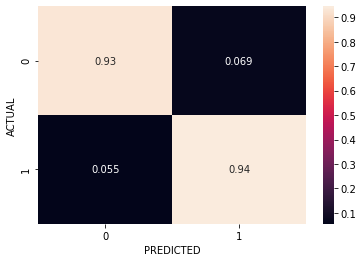

In [ ]:
sns.heatmap(df, annot = True)
plt.xlabel('PREDICTED')
plt.ylabel('ACTUAL')
plt.show()